# Hyperspectral Data Inspection

This notebook verifies data loading and examines the structure of our datasets.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Path setup
DATA_DIR = Path('../data')
IP_DIR = DATA_DIR / 'ip'

# Load Indian Pines dataset
data = loadmat(IP_DIR / 'Indian_pines.mat')
gt = loadmat(IP_DIR / 'Indian_pines_gt.mat')

# Print available keys
print('Data file keys:', data.keys())
print('Ground truth file keys:', gt.keys())

Data file keys: dict_keys(['__header__', '__version__', '__globals__', 'indian_pines'])
Ground truth file keys: dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt'])


In [3]:
# Extract the actual data arrays
# Note: We'll need to find the correct key based on the output above
ip_data = data[list(data.keys())[-1]]  # Typically the last key contains the data
ip_gt = gt[list(gt.keys())[-1]]

print('Data shape:', ip_data.shape)
print('Ground truth shape:', ip_gt.shape)

# Basic statistics
print('\nData statistics:')
print(f'Min value: {ip_data.min()}')
print(f'Max value: {ip_data.max()}')
print(f'Mean value: {ip_data.mean():.2f}')
print(f'Standard deviation: {ip_data.std():.2f}')

Data shape: (145, 145, 220)
Ground truth shape: (145, 145)

Data statistics:
Min value: 955
Max value: 9604
Mean value: 2503.44
Standard deviation: 1589.63


In [4]:
# Examine ground truth classes
unique_classes = np.unique(ip_gt)
print('\nUnique classes:', unique_classes)

# Count samples per class
class_counts = {i: np.sum(ip_gt == i) for i in unique_classes if i != 0}
print('\nSamples per class:')
for class_id, count in class_counts.items():
    print(f'Class {class_id}: {count} samples')


Unique classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

Samples per class:
Class 1: 46 samples
Class 2: 1428 samples
Class 3: 830 samples
Class 4: 237 samples
Class 5: 483 samples
Class 6: 730 samples
Class 7: 28 samples
Class 8: 478 samples
Class 9: 20 samples
Class 10: 972 samples
Class 11: 2455 samples
Class 12: 593 samples
Class 13: 205 samples
Class 14: 1265 samples
Class 15: 386 samples
Class 16: 93 samples


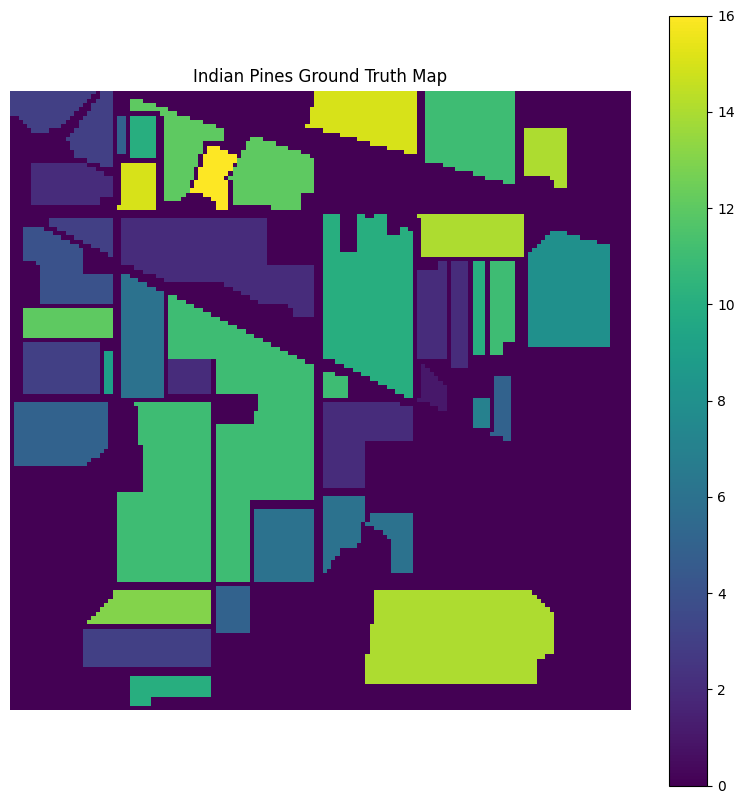

In [5]:
# Visualize ground truth map
plt.figure(figsize=(10, 10))
plt.imshow(ip_gt)
plt.colorbar()
plt.title('Indian Pines Ground Truth Map')
plt.axis('off')
plt.show()

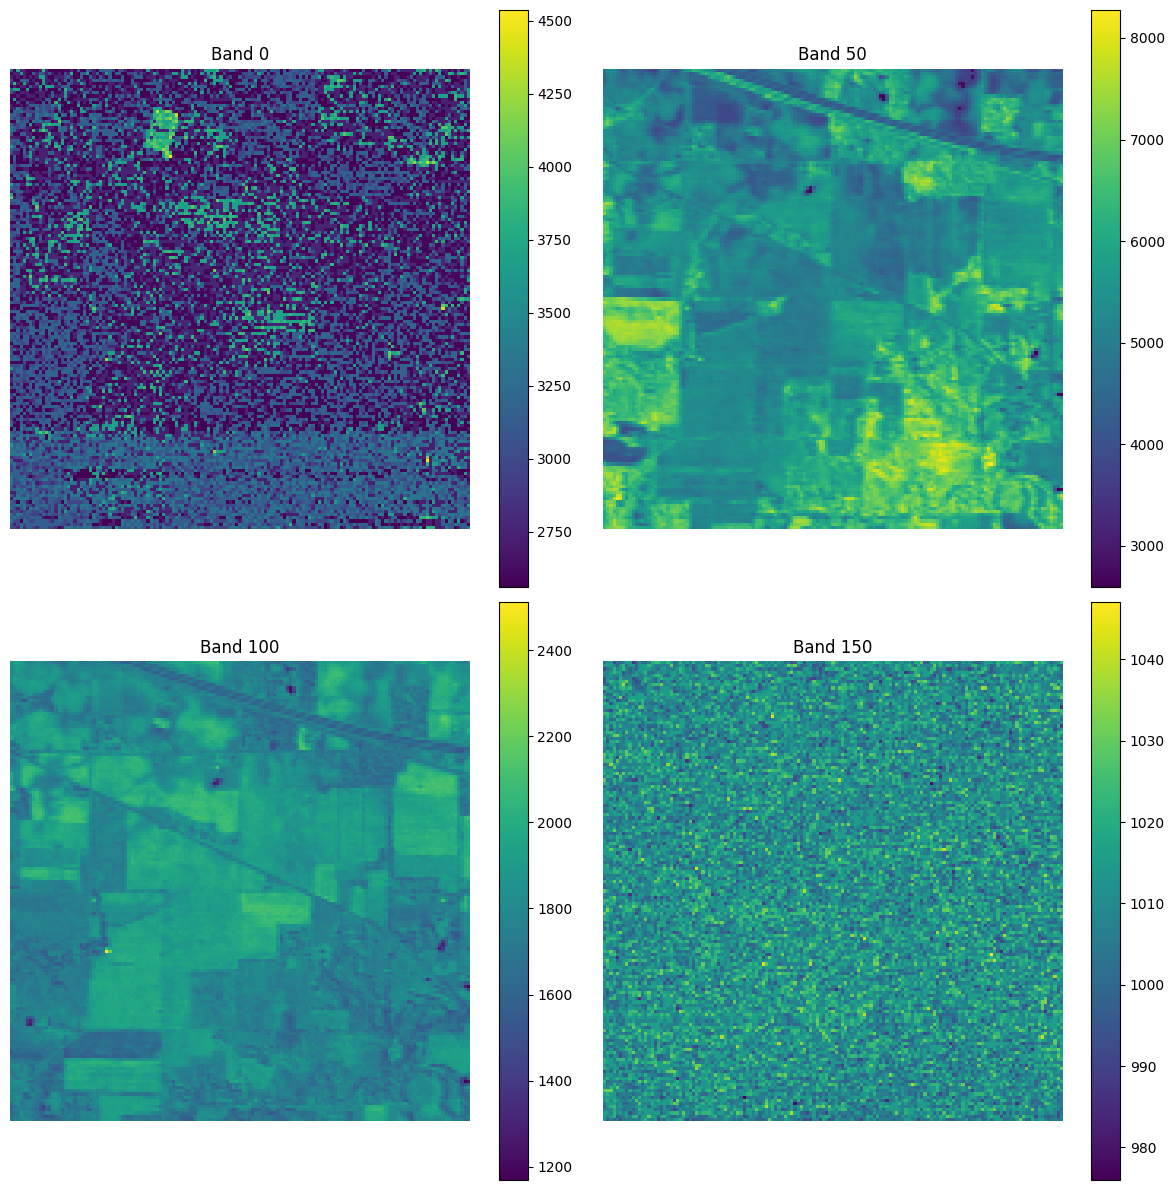

In [6]:
# Visualize a few spectral bands
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
band_indices = [0, 50, 100, 150]  # Example band indices

for ax, band_idx in zip(axes.ravel(), band_indices):
    im = ax.imshow(ip_data[:, :, band_idx])
    ax.set_title(f'Band {band_idx}')
    ax.axis('off')
    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

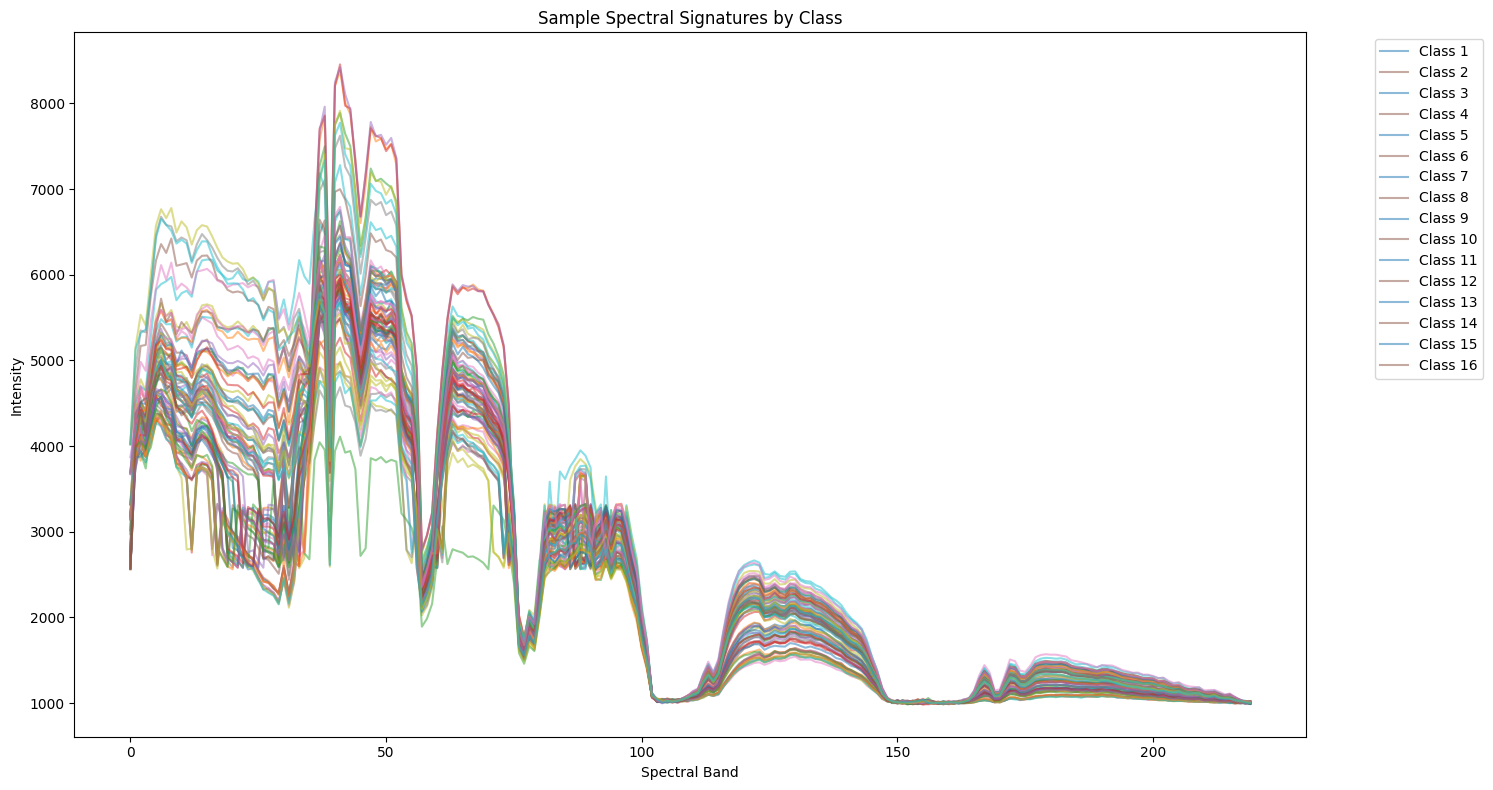

In [7]:
# Plot example spectral signatures
def plot_spectral_signatures(data, gt, num_samples_per_class=5):
    plt.figure(figsize=(15, 8))
    
    for class_id in sorted(class_counts.keys()):
        # Get indices for this class
        indices = np.where(gt == class_id)
        # Randomly select samples
        sample_idx = np.random.choice(len(indices[0]), 
                                     size=min(num_samples_per_class, len(indices[0])), 
                                     replace=False)
        
        # Plot spectral signatures
        for idx in sample_idx:
            spectrum = data[indices[0][idx], indices[1][idx], :]
            plt.plot(spectrum, alpha=0.5, label=f'Class {class_id}' if idx == sample_idx[0] else '')
    
    plt.xlabel('Spectral Band')
    plt.ylabel('Intensity')
    plt.title('Sample Spectral Signatures by Class')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot spectral signatures
np.random.seed(42)  # for reproducibility
plot_spectral_signatures(ip_data, ip_gt)